In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.compose import make_column_selector
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV


In [256]:

df_merged = pd.read_csv("df_merged.csv",delimiter =',' )
df_merged.info()
df_merged.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457629 entries, 0 to 457628
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          457629 non-null  object 
 1   imei                        457629 non-null  float64
 2   mwra                        457629 non-null  bool   
 3   p.android.settings          457629 non-null  float64
 4   p.system                    457629 non-null  float64
 5   p.android.gm                457629 non-null  float64
 6   p.android.externalstorage   457629 non-null  float64
 7   p.android.chrome            457629 non-null  float64
 8   p.android.documentsui       457629 non-null  float64
 9   p.android.packageinstaller  457629 non-null  float64
 10  p.google                    457629 non-null  float64
 11  p.inputmethod.latin         457629 non-null  float64
 12  p.olauncher                 457629 non-null  float64
 13  p.android.vend

,ts,imei,mwra,p.android.settings,p.system,p.android.gm,p.android.externalstorage,p.android.chrome,p.android.documentsui,p.android.packageinstaller,...,ssn,registration,birthdate,current_location,name,mail,job,username,IsRegistrationDefined,IsBirthdateDefined
0,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,572-95-8272,2018-09-12,1912-12-24,"(Decimal('53.210565'), Decimal('53.050848'))",Kristin Morrison,mark53@gmail.com,<__main__.NotDefined object at 0x125043230>,brandonsnyder,False,False
1,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,045-17-2993,2021-06-11,1928-05-31,"(Decimal('70.3585265'), Decimal('-174.034910'))",Lauren Torres,melissaacosta@yahoo.com,"Surveyor, minerals",danieljohnson,True,False
2,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,320-16-0929,2021-06-11,2018-06-08,"(Decimal('79.9902535'), Decimal('108.065060'))",Alexis Mcmahon,andrewwagner@hotmail.com,<__main__.NotDefined object at 0x125043230>,hamptonkenneth,True,False
3,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,332-06-2301,2021-06-11,1968-02-07,"(Decimal('-68.940105'), Decimal('-56.550552'))",Daniel Jones,amberroth@yahoo.com,<__main__.NotDefined object at 0x125043230>,brittney57,True,True
4,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,324-72-6348,2021-06-11,1949-02-18,"(Decimal('-71.935019'), Decimal('-145.662081'))",Nicholas Nelson,xcollins@gmail.com,<__main__.NotDefined object at 0x125043230>,xcain,True,False
5,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,600-97-9317,2021-06-11,1968-02-07,"(Decimal('-27.445218'), Decimal('-176.621444'))",Carla Oneal,crawfordjustin@gmail.com,"Engineer, manufacturing",williamsavage,True,True
6,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,572-95-8272,2018-09-12,1912-12-24,"(Decimal('53.210565'), Decimal('53.050848'))",Kristin Morrison,mark53@gmail.com,<__main__.NotDefined object at 0x125043230>,brandonsnyder,False,False
7,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,045-17-2993,2021-06-11,1928-05-31,"(Decimal('70.3585265'), Decimal('-174.034910'))",Lauren Torres,melissaacosta@yahoo.com,"Surveyor, minerals",danieljohnson,True,False
8,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,320-16-0929,2021-06-11,2018-06-08,"(Decimal('79.9902535'), Decimal('108.065060'))",Alexis Mcmahon,andrewwagner@hotmail.com,<__main__.NotDefined object at 0x125043230>,hamptonkenneth,True,False
9,2018-05-05 10:00:00,3.590434e+18,False,11.34798,14.13743,14.64982,9.34424,15.6655,15.26851,14.62491,...,332-06-2301,2021-06-11,1968-02-07,"(Decimal('-68.940105'), Decimal('-56.550552'))",Daniel Jones,amberroth@yahoo.com,<__main__.NotDefined object at 0x125043230>,brittney57,True,True


# In Faza 1 of the project there was a problem with outliers in p.google.
## I was trying to fix it and found out that cbrt transform works good(i tried log , sqrt , minmax )

<Axes: >

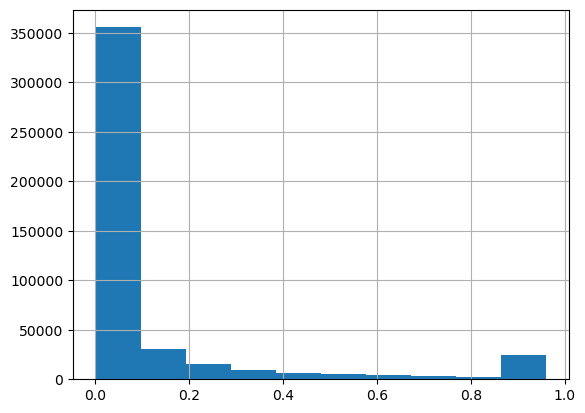

In [258]:
df_merged['p.google'].hist()

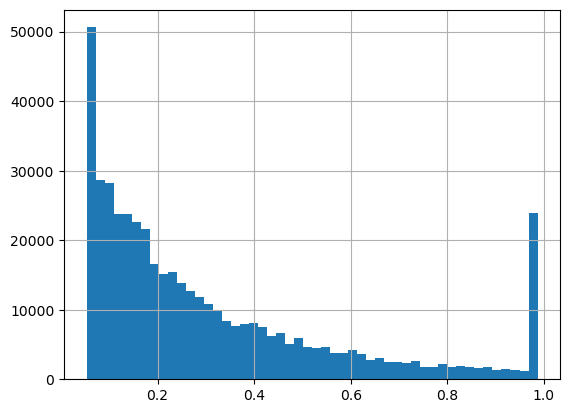

In [259]:

df_merged['p.google'] = np.cbrt(df_merged['p.google'])
df_merged['p.google'].hist(bins=50)
plt.show()


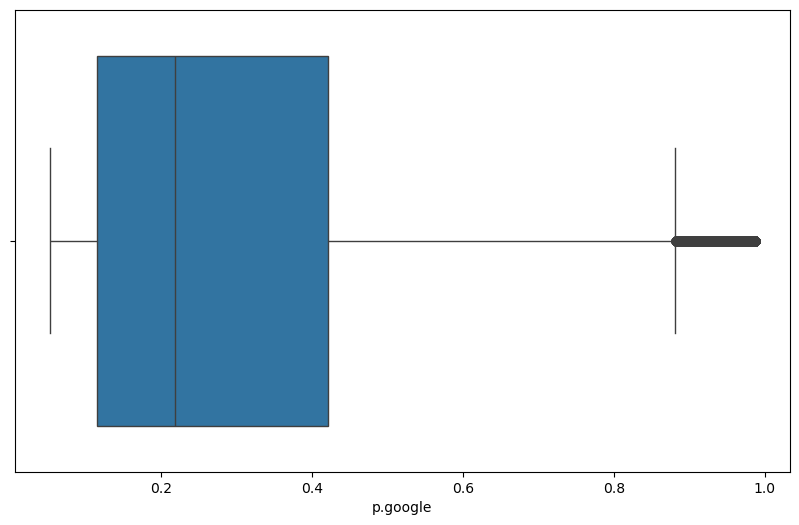

In [260]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='p.google')
plt.show()

In [261]:
def replace_outliers_with_boundaries(df, column):
    lower_bound = df[column].quantile(0.05)  
    upper_bound = df[column].quantile(0.95) 
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [262]:
df_merged = replace_outliers_with_boundaries(df_merged , 'p.google')

<Axes: >

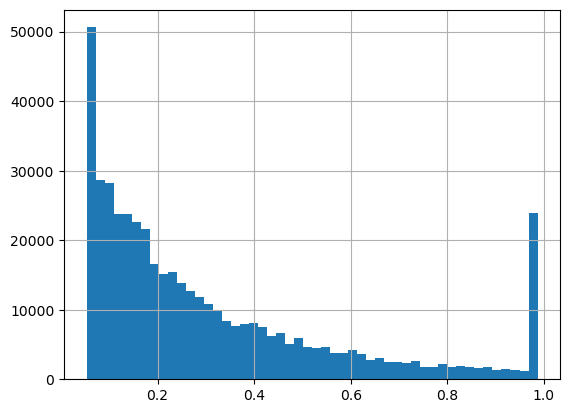

In [263]:
df_merged['p.google'].hist(bins=50)

In [264]:
def generate_outliers():
    outliers = pd.DataFrame()
    for column in df_merged.select_dtypes(include=['float64', 'int64']).columns:
        if (column == 'imei' or column =='mwra'):
            continue
        Q1 = df_merged[column].quantile(0.25)
        Q3 = df_merged[column].quantile(0.75)
        IQR = Q3 - Q1  
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers[column] = df_merged[column][(df_merged[column] < lower_bound) | (df_merged[column] > upper_bound)]
    return outliers

In [265]:
generate_outliers().info()

<class 'pandas.core.frame.DataFrame'>
Index: 30325 entries, 1002 to 457468
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   p.android.settings          0 non-null      float64
 1   p.system                    0 non-null      float64
 2   p.android.gm                0 non-null      float64
 3   p.android.externalstorage   0 non-null      float64
 4   p.android.chrome            0 non-null      float64
 5   p.android.documentsui       0 non-null      float64
 6   p.android.packageinstaller  0 non-null      float64
 7   p.google                    30325 non-null  float64
 8   p.inputmethod.latin         0 non-null      float64
 9   p.olauncher                 0 non-null      float64
 10  p.android.vending           0 non-null      float64
 11  p.android.defcontainer      0 non-null      float64
 12  p.process.gapps             0 non-null      float64
 13  p.katana                    0 no

# Split into training (80%) and test (20%) sets 

In [267]:
train_df, test_df = train_test_split(df_merged, test_size=0.2, random_state=42)

print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (366103, 51)
Test set size: (91526, 51)


In [268]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366103 entries, 172915 to 121958
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          366103 non-null  object 
 1   imei                        366103 non-null  float64
 2   mwra                        366103 non-null  bool   
 3   p.android.settings          366103 non-null  float64
 4   p.system                    366103 non-null  float64
 5   p.android.gm                366103 non-null  float64
 6   p.android.externalstorage   366103 non-null  float64
 7   p.android.chrome            366103 non-null  float64
 8   p.android.documentsui       366103 non-null  float64
 9   p.android.packageinstaller  366103 non-null  float64
 10  p.google                    366103 non-null  float64
 11  p.inputmethod.latin         366103 non-null  float64
 12  p.olauncher                 366103 non-null  float64
 13  p.android.vend

## Transform bool values to int values 

In [270]:
train_df['mwra'] = train_df['mwra'].astype(int)
train_df['IsRegistrationDefined'] = train_df['IsRegistrationDefined'].astype(int)
train_df['IsBirthdateDefined'] = train_df['IsBirthdateDefined'].astype(int)

## Transform datetimelike values to int values 

In [272]:
train_df['ts'] = pd.to_datetime(train_df['ts']).astype(int) / 10**9
train_df['registration'] = pd.to_datetime(train_df['registration']).astype(int) / 10**9
train_df['birthdate'] = pd.to_datetime(train_df['birthdate']).astype(int) / 10**9


## transform string values using LabelEncoder

In [274]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366103 entries, 172915 to 121958
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          366103 non-null  float64
 1   imei                        366103 non-null  float64
 2   mwra                        366103 non-null  int64  
 3   p.android.settings          366103 non-null  float64
 4   p.system                    366103 non-null  float64
 5   p.android.gm                366103 non-null  float64
 6   p.android.externalstorage   366103 non-null  float64
 7   p.android.chrome            366103 non-null  float64
 8   p.android.documentsui       366103 non-null  float64
 9   p.android.packageinstaller  366103 non-null  float64
 10  p.google                    366103 non-null  float64
 11  p.inputmethod.latin         366103 non-null  float64
 12  p.olauncher                 366103 non-null  float64
 13  p.android.vend

In [275]:
label_columns = ['store_name', 'code', 'location', 'residence', 'company', 'ssn', 
                 'current_location', 'name', 'mail', 'username','job']

label_encoders = {} 

for col in label_columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le 

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 366103 entries, 172915 to 121958
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          366103 non-null  float64
 1   imei                        366103 non-null  float64
 2   mwra                        366103 non-null  int64  
 3   p.android.settings          366103 non-null  float64
 4   p.system                    366103 non-null  float64
 5   p.android.gm                366103 non-null  float64
 6   p.android.externalstorage   366103 non-null  float64
 7   p.android.chrome            366103 non-null  float64
 8   p.android.documentsui       366103 non-null  float64
 9   p.android.packageinstaller  366103 non-null  float64
 10  p.google                    366103 non-null  float64
 11  p.inputmethod.latin         366103 non-null  float64
 12  p.olauncher                 366103 non-null  float64
 13  p.android.vend

## When all data is int or float i can go to scaling and transforming(2.1-C)

In [277]:
train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366103 entries, 0 to 366102
Columns: 102 entries, power__minmax__ts to quantile__minmax__IsBirthdateDefined
dtypes: float64(102)
memory usage: 284.9 MB


## Get numerical features from df 

In [279]:
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

minmax_columns = ['ts', 'imei', 'birthdate', 'registration', 'job','store_name', 'code', 'location', 'residence', 'company', 'ssn', 'current_location', 'name', 'mail', 'username']

other_columns = list(set(numeric_features) - set(minmax_columns))


## devide df in two parts

### for first part i will use MinMaxScaler and yeo-johnson transformer 

### for second part i will use StandardScaler and QuantileTransformer

### i have choose this attributes for minmax because of its very big values and if not use minmax np will get overflow



In [281]:
pipeline_part1 = Pipeline(steps=[
    ('transforming', QuantileTransformer(output_distribution='normal')), 
    ('scaling', MinMaxScaler())
])

In [282]:
pipeline_part2 = Pipeline(steps=[
    ('transforming', PowerTransformer(method='yeo-johnson')),  
    ('scaling', StandardScaler()) 
])

In [283]:
transformed_first_half = pipeline_part1.fit_transform(train_df[minmax_columns])
transformed_second_half = pipeline_part2.fit_transform(train_df[other_columns])


In [308]:
transformed_data = np.hstack((transformed_first_half, transformed_second_half))


## receive df again

In [311]:
train_transformed_df = pd.DataFrame(transformed_data, columns=(pipeline_part1.get_feature_names_out(input_features=minmax_columns).tolist() + 
                                                                pipeline_part2.get_feature_names_out(input_features=other_columns).tolist()))

In [313]:
train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366103 entries, 0 to 366102
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ts                          366103 non-null  float64
 1   imei                        366103 non-null  float64
 2   birthdate                   366103 non-null  float64
 3   registration                366103 non-null  float64
 4   job                         366103 non-null  float64
 5   store_name                  366103 non-null  float64
 6   code                        366103 non-null  float64
 7   location                    366103 non-null  float64
 8   residence                   366103 non-null  float64
 9   company                     366103 non-null  float64
 10  ssn                         366103 non-null  float64
 11  current_location            366103 non-null  float64
 12  name                        366103 non-null  float64
 13  mail          

## 2.2.A

### Using corelation matrix

In [315]:
correlation_matrix = train_transformed_df.corr()
correlation_with_target = correlation_matrix['mwra'].sort_values(ascending=False)
print("corr with mwra':")
print(correlation_with_target)

corr with mwra':
mwra                          1.000000
c.katana                      0.527803
c.android.youtube             0.294798
c.dogalize                    0.281909
p.android.externalstorage     0.268127
p.process.gapps               0.018903
p.android.defcontainer        0.013140
c.UCMobile.intl               0.008528
c.updateassist                0.007029
p.katana                      0.006621
longitude                     0.006342
p.google                      0.006087
p.android.settings            0.005402
user_id                       0.005203
c.android.chrome              0.004490
location                      0.004411
registration                  0.003969
c.android.vending             0.003266
company                       0.002386
p.android.chrome              0.002166
c.raider                      0.001830
ssn                           0.001797
p.gms.persistent              0.001443
p.notifier                    0.000729
p.olauncher                   0.000575
p.dogali

## Using random forest

In [322]:
X = train_transformed_df.drop(columns=['mwra'])
y = train_transformed_df['mwra']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("importance of atri ")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} - importance: {importances[indices[f]]:.4f}")

importance of atri 
1. p.android.gm - importance: 0.3501
2. c.android.gm - importance: 0.1190
3. c.dogalize - importance: 0.0997
4. c.katana - importance: 0.0957
5. p.android.documentsui - importance: 0.0332
6. c.android.youtube - importance: 0.0292
7. p.android.externalstorage - importance: 0.0196
8. p.android.packageinstaller - importance: 0.0175
9. p.system - importance: 0.0152
10. ts - importance: 0.0133
11. c.android.chrome - importance: 0.0131
12. p.android.chrome - importance: 0.0112
13. p.gms.persistent - importance: 0.0107
14. p.android.gms - importance: 0.0103
15. p.dogalize - importance: 0.0102
16. c.UCMobile.intl - importance: 0.0101
17. p.process.gapps - importance: 0.0100
18. p.inputmethod.latin - importance: 0.0099
19. p.notifier - importance: 0.0098
20. p.simulator - importance: 0.0098
21. p.olauncher - importance: 0.0096
22. p.android.defcontainer - importance: 0.0092
23. c.android.vending - importance: 0.0091
24. p.katana - importance: 0.0091
25. c.raider - importance

Using LASSO

In [329]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

lasso_coef = lasso.coef_
important_features = X.columns[np.abs(lasso_coef) > 0]

print(" LASSO important atri:")
for feature in important_features:
    print(feature)

 LASSO important atri:
ts
imei
c.updateassist
p.android.vending
p.google
p.android.defcontainer
IsBirthdateDefined
p.notifier
c.raider
p.android.gms
p.system
p.process.gapps
c.android.gm
p.android.gm
c.UCMobile.intl
p.gms.persistent
c.android.chrome
c.android.vending
p.android.packageinstaller
p.olauncher
p.simulator
p.dogalize
IsRegistrationDefined
p.browser.provider
p.android.documentsui
c.UCMobile.x86
longitude
user_id
p.android.chrome
p.inputmethod.latin
p.katana
c.katana
c.dogalize
p.android.externalstorage
c.android.youtube


## 2.2B

Positive Correlations:

## c.katana:

Importance from Random Forest: 0.0957

Present in the LASSO list

Positive correlation with mwra: 0.5278

## c.dogalize:

Importance from Random Forest: 0.0997

Present in the LASSO list

Positive correlation with mwra: 0.2819

## c.android.youtube:

Importance from Random Forest: 0.0292

Present in the LASSO list

Positive correlation with mwra: 0.2948

## p.android.externalstorage:

Importance from Random Forest: 0.0196

Present in the LASSO list

Positive correlation with mwra: 0.2681

Negative Correlations:

## p.android.gm:

Importance from Random Forest: 0.3501

Present in the LASSO list

Negative correlation with mwra: -0.5892

## c.android.gm:


Importance from Random Forest: 0.1190

Present in the LASSO list

Negative correlation with mwra: -0.5975

## p.android.documentsui:

Importance from Random Forest: 0.0332

Present in the LASSO list

Negative correlation with mwra: -0.3018

## p.system:

Importance from Random Forest: 0.0152

Present in the LASSO list

Negative correlation with mwra: -0.2870